Theodore Jagodits Homework #1 CS 433

In [78]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
#read file w/ pandas
filepath = 'AirQualityUCI.csv'
air_quality_data = pd.read_csv(filepath, sep = ';')

In [57]:
#rows and columns
air_quality_data.shape

(9471, 16)

In [58]:
#print head first 5 cols
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN


In [59]:
#drop random column at the end
air_quality_data.drop(labels='Unnamed: 15', axis=1,inplace=True)

In [60]:
#print head first 5 cols
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [61]:
#rows and columns
air_quality_data.shape

(9471, 15)

In [62]:
#find the data type of the columns
print(air_quality_data.dtypes)

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object


In [63]:
print(air_quality_data.isnull().sum())

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64


In [72]:
#make new dataframe for transformations
new_data = air_quality_data.copy(deep = True)

In [74]:
#drop all objects
new_data.drop(labels=['Date','Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'], axis=1,inplace=True)

In [75]:
new_data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [76]:
#fill in values
new_data.fillna(value = new_data.median(), inplace=True)

In [77]:
#check that it worked
new_data.isnull().sum()

PT08.S1(CO)      0
NMHC(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
dtype: int64

NOTE: could not to astype float(for the other objects) very well and solution googled gave an error, did not pursue any further

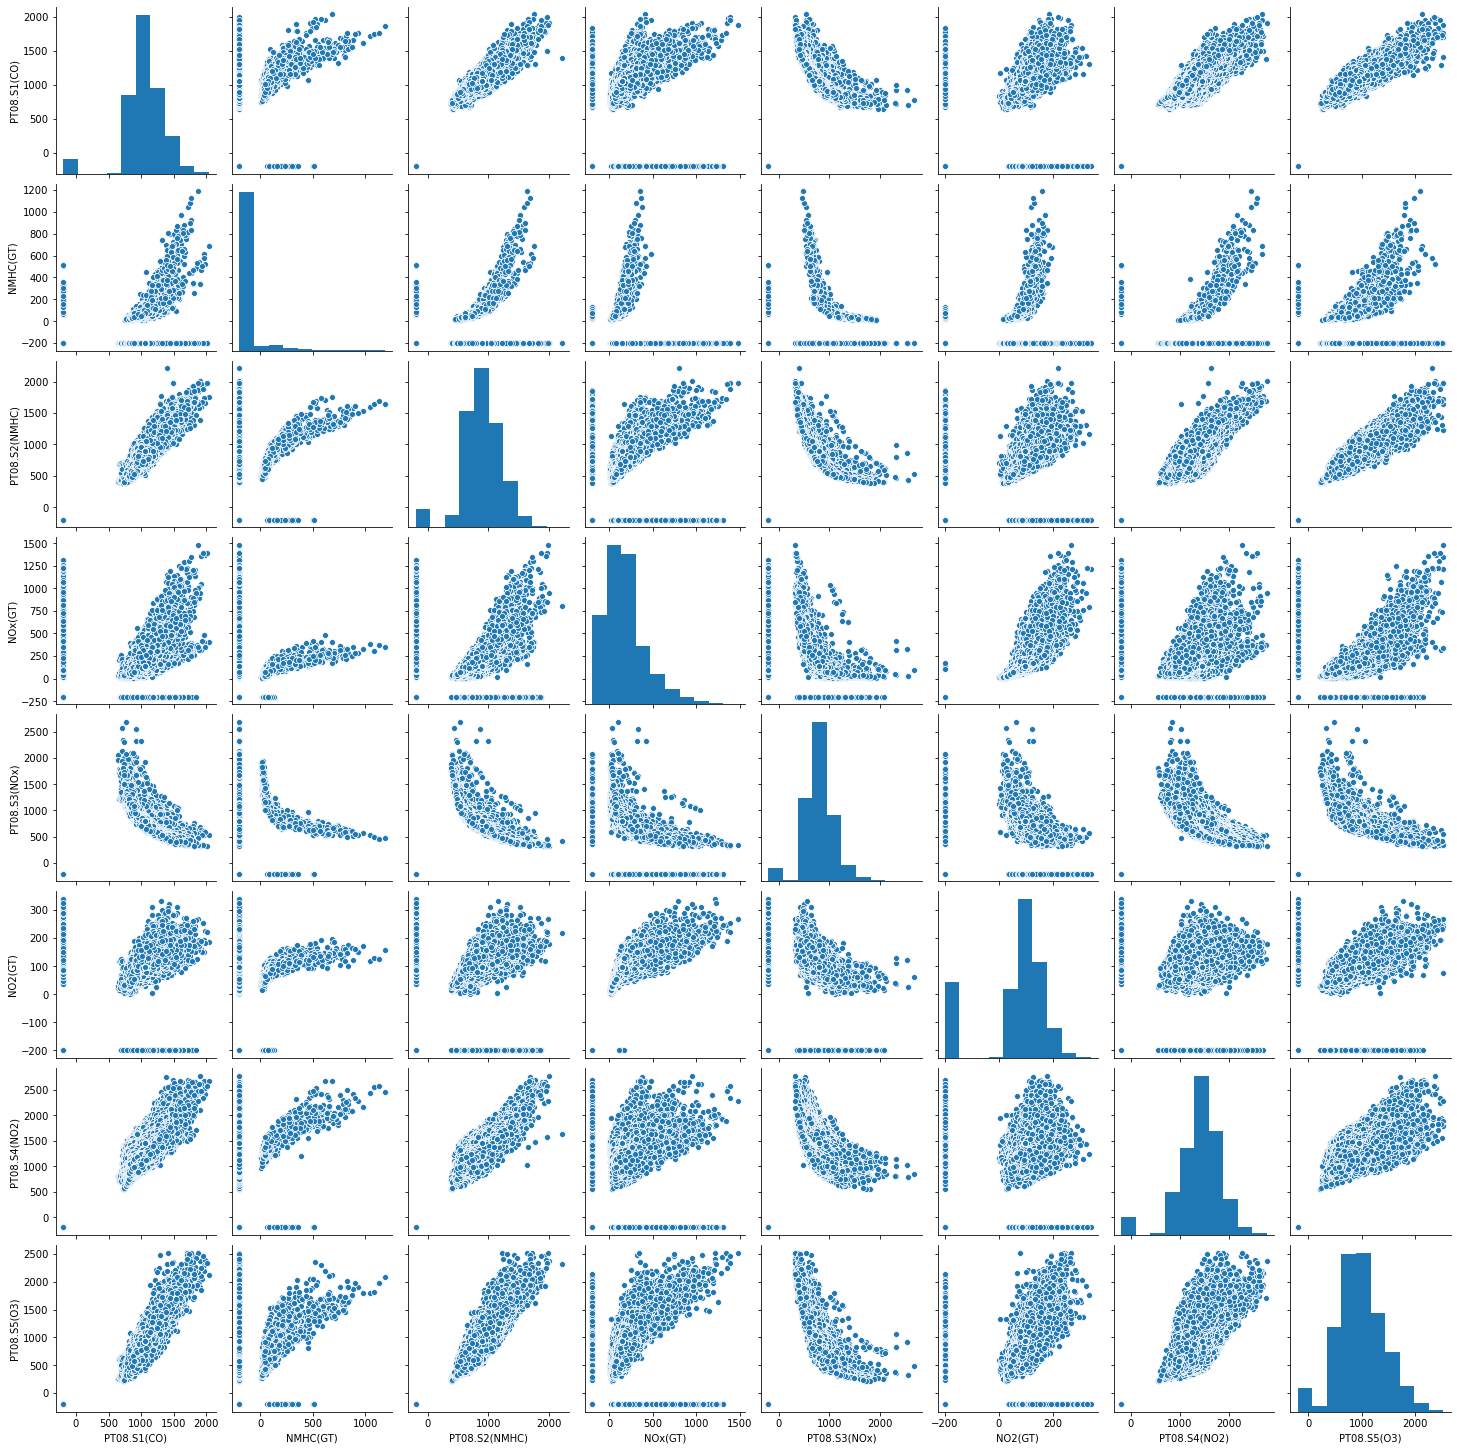

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
PT08.S1(CO),1.000000,0.169877,0.933101,0.277957,0.087019,0.153991,0.845096,0.892395
NMHC(GT),0.169877,1.000000,0.110043,-0.004047,0.048807,0.102150,0.162172,0.101385
PT08.S2(NMHC),0.933101,0.110043,1.000000,0.331248,-0.073667,0.176398,0.874712,0.909875
NOx(GT),0.277957,-0.004047,0.331248,1.000000,-0.436050,0.816261,0.035390,0.461936
PT08.S3(NOx),0.087019,0.048807,-0.073667,-0.436050,1.000000,-0.256106,0.122720,-0.208856
NO2(GT),0.153991,0.102150,0.176398,0.816261,-0.256106,1.000000,-0.021741,0.253036
PT08.S4(NO2),0.845096,0.162172,0.874712,0.035390,0.122720,-0.021741,1.000000,0.723507
PT08.S5(O3),0.892395,0.101385,0.909875,0.461936,-0.208856,0.253036,0.723507,1.000000


In [81]:
# Basic correlogram
sns.pairplot(new_data)
plt.show()

corr = new_data.corr()
corr.style.background_gradient(cmap='coolwarm')

In [82]:
#linear regression
reg = linear_model.LinearRegression()

In [92]:
#taking NOx(GT) / NMHC(GT)	
NOx = new_data['NOx(GT)'].astype(float)
NMHC = new_data['NMHC(GT)'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(NOx, NMHC , test_size=0.2, random_state=4)

#reshape
print(y_train.shape) 
y_train = y_train[:,None]
print(y_train.shape)
x_train = x_train[:,None]
print(x_train.shape)
x_test = x_test[:,None]
y_test = y_test[:,None]

(7576,)
(7576, 1)
(7576, 1)


In [93]:
#run
reg.fit(x_train, y_train)

LinearRegression()

In [94]:
print(reg.coef_)
print(reg.intercept_)

[[-0.00178749]]
[-159.05638051]


In [95]:
yhat = reg.predict(x_test)

In [96]:
# mean squared error
np.mean((yhat-y_test)**2)

18590.45233410808

In [97]:
print(y_test[0])
print((np.mean(yhat-y_test)**2)/np.mean(y_test))

[-200.]
-0.007903060648982274


In [98]:
# R squared error https://medium.com/@erika.dauria/looking-at-r-squared-721252709098
temp_mean = np.mean(y_test)
np.mean((yhat-y_test)**2) / np.mean((yhat - temp_mean))

16507.835206468546